In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
ppath = "/Users/glengyel/Library/Mobile Documents/com~apple~CloudDocs/Projects/Neural_link_of_CI/neural_link/results/"
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import gaussian_kde

from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import beta
import h5py

clist = []
for cname in ["winter", "spring"]:
    c = cm.get_cmap(cname, 100)
    clist.append(ListedColormap(c(np.linspace(0, 1, 10))))

p = os.getcwd()
Pth = os.path.dirname(p)
FigPath= "/plots/"
saveFigPath = Pth+FigPath

FigParams = {
    "fig_size": 6,
    "font1": {"fontname": "Arial", "size": 30},
    "font2": {"fontname": "Arial", "size": 30},
    "line_w": 2,
    "colors_maps": clist,
    "colors_names": ["royalblue", "olivedrab", "darkorange", "firebrick"],
    "saveFigPath": saveFigPath,
    "ErrorBar": {'ErrDist':[0.4,0.4],
                 'ErrSize':1,
                 'ErrWid':4,
                 'sizedots':10,
                 'ErrColor':["royalblue", "olivedrab", "darkorange", "firebrick"],
                 'DotsColor':["royalblue", "olivedrab", "darkorange", "firebrick"],
                 'sizeMean':25},
}


def packParams():
    return (FigParams["fig_size"],
            FigParams["font1"],
            FigParams["font2"],
            FigParams["line_w"],
            FigParams["colors_maps"],
            FigParams["colors_names"],
            FigParams["saveFigPath"],)


def vector_subtract(direction1, speed1, direction2, speed2):
    # Convert direction and speed to Cartesian coordinates
    x1 = speed1 * np.cos(np.radians(direction1))
    y1 = speed1 * np.sin(np.radians(direction1))
    x2 = speed2 * np.cos(np.radians(direction2))
    y2 = speed2 * np.sin(np.radians(direction2))
    
    # Subtract the vectors
    x_diff = x1 - x2
    y_diff = y1 - y2
    
    # Convert the result back to direction and speed
    result_speed = np.sqrt(x_diff**2 + y_diff**2)
    result_direction = np.degrees(np.arctan2(y_diff, x_diff))
    
    # Ensure the direction is in the range [-180, 180)
    if result_direction >= 180:
        result_direction -= 360
    elif result_direction < -180:
        result_direction += 360
    
    return result_direction, result_speed



In [2]:
figS, f_font1, f_font2, line_w, cm, cn, sp = packParams()

# Example observer

In [3]:
# open the file in read mode
files = [
         'post_vel_grpVar_subj2_struct1.mat',
            'post_vel_grpVar_subj2_struct2.mat',
            'post_vel_grpVar_subj2_struct3.mat',
            'post_vel_grpVar_subj2_struct4.mat',
            'post_vel_grpVar_subj2_struct5.mat',
            'post_vel_grpVar_subj2_structAll.mat'
]
struct_all = []
for ni,n in enumerate(files):
    # open the file in read mode
    with h5py.File('/Users/glengyel/Projects_data/Neural Predictions/'+n, 'r') as file:
        # list all the keys in the root group
        print(list(file.keys()))

        # access a dataset
        #vel_post = file['vel_post']
        #print(vel_post.shape)
        #vel_post = np.array(vel_post)
        #print(vel_post.shape)
        if ni==len(files)-1:
            # access a dataset
            str_post = file['struct_post']
            #print(vel_post.shape)
            str_post = np.array(str_post)
            print(str_post.shape)
        # access a dataset
        dir_post = file['dir_post']
        #print(dir_post.shape)
        dir_post = np.array(dir_post)
        print(dir_post.shape)

        # access a dataset
        spd_post = file['spe_post']
        #print(spd_post.shape)
        spd_post = np.array(spd_post)
        print(spd_post.shape)
        struct_all.append([dir_post, spd_post])

['dir_post', 'spe_post', 'vel_post']
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
['dir_post', 'spe_post', 'vel_post']
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
['dir_post', 'spe_post', 'vel_post']
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
['dir_post', 'spe_post', 'vel_post']
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
['dir_post', 'spe_post', 'vel_post']
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
['dir_post', 'spe_post', 'struct_post', 'vel_post']
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)


Speed: 7cps
direction: center=45, surround=0
Speed: 7cps
direction: center=45, surround=0


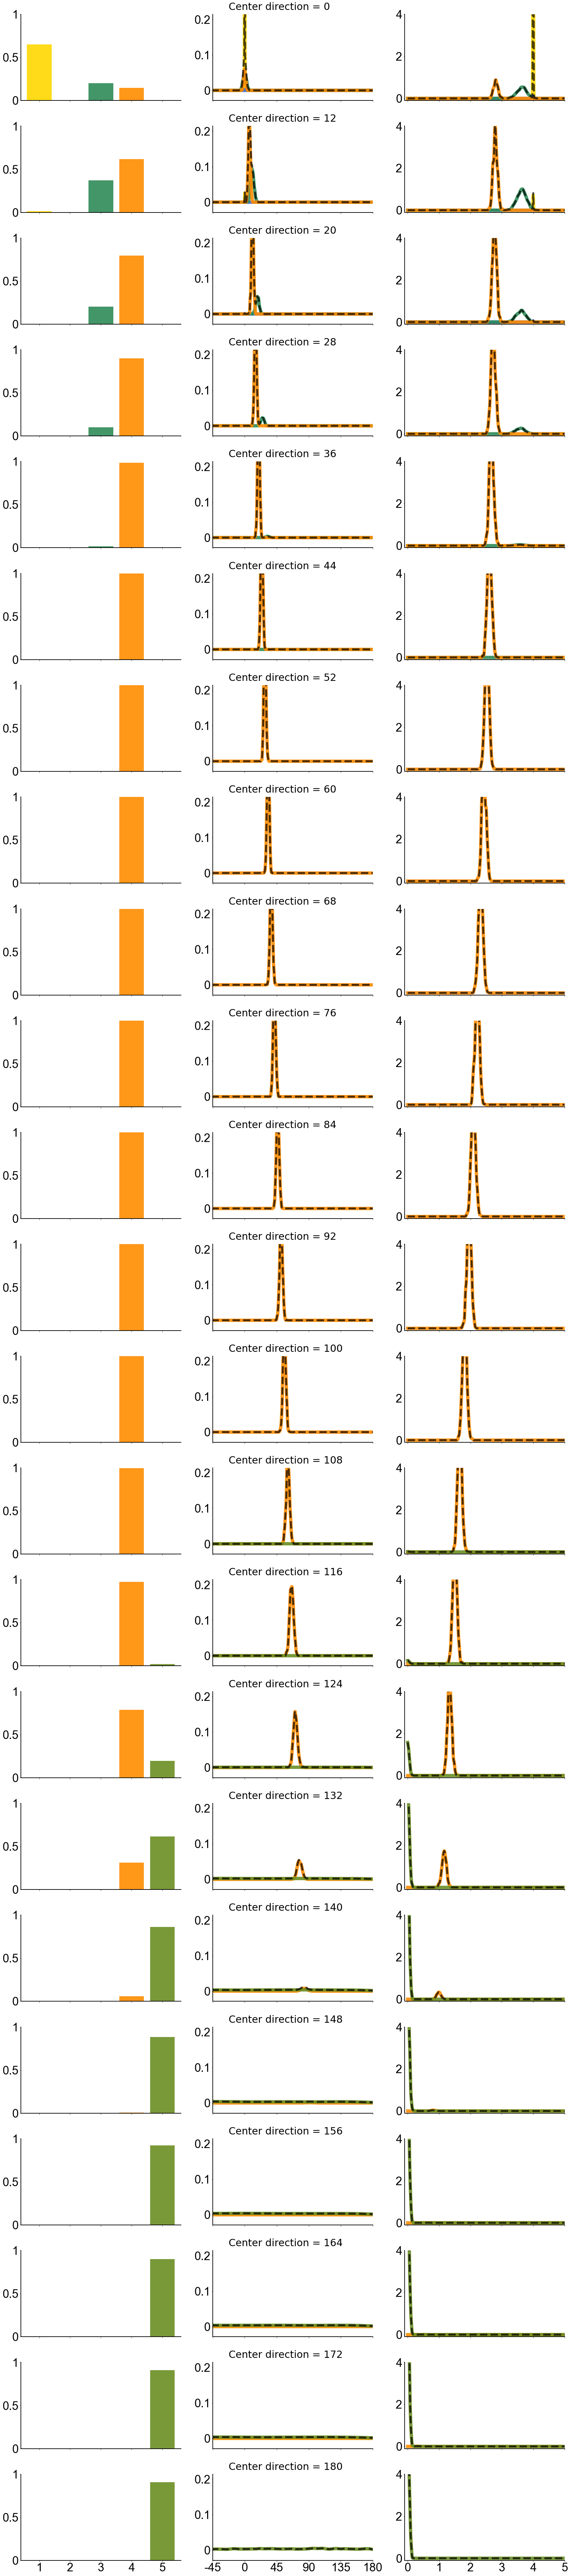

In [4]:

l = dir_post.shape[1]
xtckL = ["-90","-45","0","45","90"]
ytck = [60,90,120,150]
ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20

xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-135,-90,-45,0,45,90,135,180]
#xtckL = ["-180","-90","0","90","180"]
#tck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
degree_values = np.linspace(-180, 180,l)
degS = 45#int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
x = [45, 48, 51, 57, 68, 78, 79, 80, 90]
x = [45, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90]
#x = range(45, 91, 2)
xL = degree_values[x]
x_evalD = np.linspace(-180, 180, num=1000)
x_evalS = np.linspace(0, 6, num=1000)
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
colors = ["gold", "royalblue", "seagreen","darkorange","olivedrab"]
cNames = ["CS Integration","CS Segmentation", "Center Reference", "Intermediate Reference", "Independent", "All"]
struct_id = [13,14,15,16,4,0]
_, axs = plt.subplots(len(x), 3, figsize=(figS*4, figS*18))
axs = axs.flatten()
p=0
bw = 0.2
cs,ss = 2,2
for ti,degC in enumerate(x):
    bw=0.03 if degC==90 else 0.2
    for i in range(3):
        ax = axs[p]
        if i==0:
            for c,P in enumerate(struct_all[:-1]):
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                ax.bar(c, z, color=colors[c], alpha=0.9)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(range(len(struct_all)-1))
            #ax.xaxis.set_ticklabels(range(1,len(struct_all)))
            ax.yaxis.set_ticks([0,0.5, 1])
            ax.set_ylim(0, 1)
            ax.yaxis.set_ticklabels([0, 0.5, 1])
            ax.set_xlim(-0.6, 4.6)
            if p>(len(x)*3-4):
                ax.xaxis.set_ticklabels(range(1,len(struct_all)))
            else:
                ax.xaxis.set_ticklabels([])
        elif i==1:
            mv = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[0][:,degC,degS,cs,ss]
                Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
                kde = gaussian_kde(Y0, bw_method=bw)
                Y = kde(x_evalD)
                X = x_evalD.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+8, alpha=0.9)
                mv.append(M)
            ax.plot(x_evalD, np.sum(mv, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xtck_)
            
            if p>(len(x)*3-3):
                ax.xaxis.set_ticklabels(xtck_)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-45, 180)
            # if p in [10,12,14]:
            #     ax.yaxis.set_ticks([0,0.06, 0.12])
            #     ax.set_ylim(-0.015, 0.12)
            #     ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            # else:
            ax.yaxis.set_ticks([0,0.07, 0.14])
            ax.set_ylim(-0.02, 0.15)
            ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            stimType = 'Center direction = '+str(round(xL[ti]))
            ax.annotate(stimType, xy=(0.1,1.05),xycoords='axes fraction',fontsize=f_font1["size"])
        elif i==2:
            ytck = [0,1,2,3,4,5]
            #ytckL = ["0","3","6","9","12"]
            mv = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[1][:,degC,degS,cs,ss].copy()
                if (Y0==0).all():
                    Y0 = np.random.normal(loc=0,scale=0.05,size=2000)
                    #Y0[Y0<0] = -Y0[Y0<0]
                kde = gaussian_kde(Y0, bw_method=0.2)
                Y = kde(x_evalS)
                #print(Y)
                X = x_evalS.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+8, alpha=0.9)
                mv.append(M)
            ax.plot(x_evalS, np.sum(mv, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(ytck)
            ax.yaxis.set_ticks([0,2,4])
            if p>(len(x)*3-2):
                ax.xaxis.set_ticklabels(ytck)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-0.1, 5)
            ax.set_ylim(-0.1, 4)
            ax.yaxis.set_ticklabels([0, 2, 4])
        p+=1
    #ax.set_xlabel(" ")
    #ax.set_ylabel(L[i], **f_font2)
    #plt.tight_layout()
plt.tight_layout(h_pad=4, w_pad=4)
plt.savefig(sp+"MixPostDir_subj2_grp_surr0.pdf")
plt.show()

In [5]:
 # open the file in read mode
with h5py.File('/Users/glengyel/Projects_data/Neural Predictions/post_vel_grpVar_subj2_structAll.mat', 'r') as file:
    # list all the keys in the root group
    print(list(file.keys()))

    #access a dataset
    vel_post = file['vel_post']
    print(vel_post.shape)
    vel_post = np.array(vel_post)
    print(vel_post.shape)

['dir_post', 'spe_post', 'struct_post', 'vel_post']
(2, 1000, 91, 91, 5, 5)
(2, 1000, 91, 91, 5, 5)


(array([ 67.,  60.,  10.,   3.,  26.,  83.,  85.,  28.,   2., 636.]),
 array([2.6557431 , 2.79240338, 2.92906367, 3.06572396, 3.20238425,
        3.33904453, 3.47570482, 3.61236511, 3.74902539, 3.88568568,
        4.02234597]),
 <BarContainer object of 10 artists>)

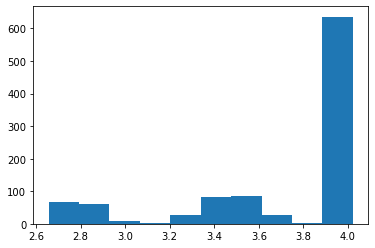

In [6]:
plt.hist(vel_post[0,:,45,degS,cs,ss])

In [7]:

l = dir_post.shape[1]
xtckL = ["-90","-45","0","45","90"]
ytck = [60,90,120,150]
ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20

xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-135,-90,-45,0,45,90,135,180]
#xtckL = ["-180","-90","0","90","180"]
#tck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
degree_values = np.linspace(-180, 180,l)
degS = 45#int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
x = [45, 48, 51, 57, 68, 78, 79, 80, 90]
x = [45, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90]
#x = range(45, 91, 2)
xL = degree_values[x]
x_evalD = np.linspace(-180, 180, num=1000)
x_evalS = np.linspace(0, 6, num=1000)
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
colors = ["gold", "royalblue", "seagreen","darkorange","olivedrab"]
cNames = ["CS Integration","CS Segmentation", "Center Reference", "Intermediate Reference", "Independent", "All"]

Speed: 7cps
direction: center=45, surround=0
Speed: 7cps
direction: center=45, surround=0


In [9]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

Speed: 4cps
direction: center= 0.0 surround=0
Speed: 4cps
direction: center= 0.0 surround=0
Found 42 values inside the range [3.99, 4.01].
Found 958 values outside the range.
Will replace 16 values.
Best bandwidth found: 0.100
Max density: 1.3685314609662118 Min density: -518.1249700717276
Speed: 4cps
direction: center= 0.0 surround=0
Speed: 4cps
direction: center= 0.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
Found 0 values inside the range [3.99, 4.01].
Found 1000 values outside the range.
Will replace 0 values.
Best bandwidth found: 0.100
Max density: 2.388906578708621 Min density: -854.8061196277041
Speed: 4cps
direction: center= 132.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0


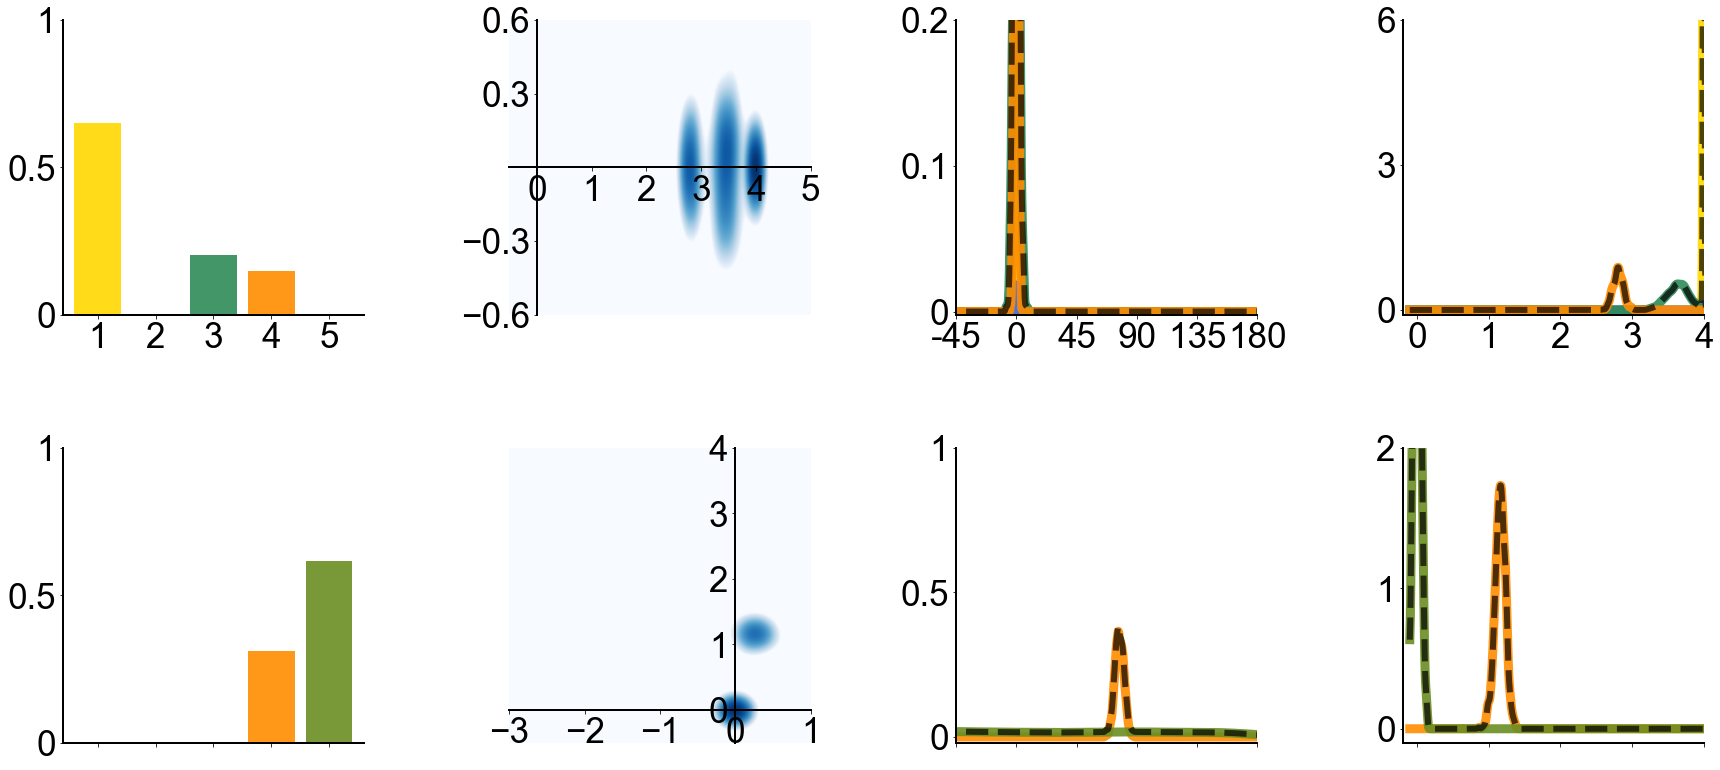

In [14]:
xtck_ = [-180,-135,-90,-45,0,45,90,135,180]
degree_values = np.linspace(-180, 180,l)
x_evalD = np.linspace(-180, 180, num=1000)
dx = x_evalD[1] - x_evalD[0]
x_evalS = np.linspace(-0.1, 6, num=1000)
bandwidths = {'bandwidth': np.logspace(-1, 1, 20)}
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
colors = ["gold", "royalblue", "seagreen","darkorange","olivedrab"]
cNames = ["CS Integration","CS Segmentation", "Center Reference", "Intermediate Reference", "Independent", "All"]
struct_id = [13,14,15,16,4,0]
_, axs = plt.subplots(2,4, figsize=(figS*4, figS*1.8))
axs = axs.flatten()
p=0
bw = 0.2
cs,ss = 2,2
degS = 45
xC = [45, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90]
XL = [[-0.5, 5],
      [-3, 1],
      [-0.6, 0.6]]
YL = [[-0.6, 0.6],
      [-0.5, 4],
      [-0.5, 1.5],
      [-0.6, 0.6]]
xt = [[0,1,2,3,4,5],
      [-3,-2,-1,0,1],
      [-0.6,-0.3,0.3,0.6]]
yt = [[-0.6,-0.3,0.3,0.6],
      [0,1,2,3,4],
      [-0.6,-0.3,0.3,0.6]]

for si,six in enumerate([0,16]):
    for i in range(4):
        degC=xC[six]
        print("Speed: 4cps")
        print("direction: center=",degree_values[degC], "surround=0")
        
        bw=0.03 if degC==90 else 0.2
        vmx = 4 if si==0 else 25
        ax = axs[p]
        if i==1:
            x=vel_post[0,:,degC,degS,cs,ss]
            y=vel_post[1,:,degC,degS,cs,ss]
            # if si==1:
            #     D = np.vstack([x[x!=0], y[y!=0]])
            # else:
            ix4 = (x > 3.99) & (x < 4.01)
            # np.where gives us the actual integer indices where the condition is True
            target_indices = np.where(ix4)[0]
            source_indices = np.where(np.invert(ix4))[0]
            # Check how many we found
            print(f"Found {len(target_indices)} values inside the range [3.99, 4.01].")
            print(f"Found {len(source_indices)} values outside the range.")
            # 2. Determine how many values to replace
            # Calculate 40% of the number of target values
            num_to_replace = int(len(target_indices) * 0.4)
            print(f"Will replace {num_to_replace} values.")
            ix4_ = np.random.choice(target_indices, size=num_to_replace, replace=False)
            # 4. Randomly select the source indices (ix4not_) from the source group
            # We choose *with* replacement, allowing a single "good" outside value to be copied multiple times,
            # effectively overweighting the source distribution.
            ix4not_ = np.random.choice(source_indices, size=num_to_replace, replace=True)
            # 5. Perform the replacement on the original array slice
            x[ix4_] = x[ix4not_]
            y[ix4_] = y[ix4not_]
            D = np.vstack([x, y])
            #bwv=0.4 #if degC==45 else 0.4
            #kde2 = gaussian_kde(D,bw_method=bwv)
            # Define grid range based on the data
            #e = 0.5
            xl = XL[si]
            yl = YL[si]
            #x_min, x_max = x.min() - e, x.max() + e
            #y_min, y_max = y.min() - e, y.max() + e
            xx, yy = np.meshgrid(np.linspace(xl[0], xl[1], 1000), np.linspace(yl[0], yl[1], 1000))
            grid_coords = np.vstack([xx.ravel(), yy.ravel()])
            #zz2 = kde2.logpdf(grid_coords).reshape(xx.shape)
            # 2. Use cross-validation to find the best bandwidth
            grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                                bandwidths,
                                cv=5) # 5-fold cross-validation
            grid.fit(D.T)
            print(f"Best bandwidth found: {grid.best_params_['bandwidth']:.3f}")
            # 3. Use the best estimator found by the grid search
            kde_best = grid.best_estimator_
            # 4. Evaluate and plot
            zz2 = kde_best.score_samples(grid_coords.T).reshape(xx.shape)
            print("Max density:", zz2.max(), "Min density:", zz2.min())
            ax.pcolormesh(xx, yy, zz2, cmap=CM[1], shading='gouraud',vmin=-zz2.max(), vmax=zz2.max())#,vmin=0, vmax=0.05)
            #if si==1:
            #    ax.plot([0],[0], "o", markersize=line_w+ms-6, markerfacecolor="darkblue") #markeredgecolor="lightblue", markeredgewidth=line_w+4)
                #ax.plot(x,y)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            # Move axes to the center (x=0 and y=0)
            ax.spines["left"].set_position(("data", 0))  # Position y-axis at x=0
            ax.spines["bottom"].set_position(("data", 0))  # Position x-axis at y=0
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)

            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xt[si])
            ax.yaxis.set_ticks(yt[si])
            ax.set_xlim(xl[0], xl[1])
            ax.set_ylim(yl[0], yl[1])

        elif i==3:
            ytck = [0,1,2,3,4]
            #ytckL = ["0","3","6","9","12"]
            mv2 = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[1][:,degC,degS,cs,ss].copy()
                if (Y0==0).all():
                    Y0 = np.random.normal(loc=0,scale=0.05,size=2000)
                kde = gaussian_kde(Y0, bw_method=0.2)
                Y = kde(x_evalS)
                X = x_evalS.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+7, alpha=0.9)
                mv2.append(M)
            ax.plot(x_evalS, np.sum(mv2, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(ytck)
            
            if p==3:
                ax.xaxis.set_ticklabels(ytck)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-0.2, 4)
            if si==0:
                ax.set_ylim(-0.1, 6)
                ax.yaxis.set_ticks([0,3,6])
                ax.yaxis.set_ticklabels([0, 3, 6])
            else:
                ax.set_ylim(-0.1, 2)
                ax.yaxis.set_ticks([0,1,2])
                ax.yaxis.set_ticklabels([0, 1, 2])
        elif i==0:
            for c,P in enumerate(struct_all[:-1]):
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                ax.bar(c, z, color=colors[c], alpha=0.9)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(range(len(struct_all)-1))
            #ax.xaxis.set_ticklabels(range(1,len(struct_all)))
            ax.yaxis.set_ticks([0,0.5, 1])
            ax.set_ylim(0, 1)
            ax.yaxis.set_ticklabels([0, 0.5, 1])
            ax.set_xlim(-0.6, 4.6)
            if p==0:
                ax.xaxis.set_ticklabels(range(1,len(struct_all)))
            else:
                ax.xaxis.set_ticklabels([])
        elif i==2:
            mv = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[0][:,degC,degS,cs,ss]
                Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
                kde = gaussian_kde(Y0, bw_method=bw)
                Y = kde(x_evalD)
                X = x_evalD.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+7, alpha=0.9)
                mv.append(M)
            #print(np.sum(mv, axis=0))
            ax.plot(x_evalD, np.sum(mv, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xtck_)
            
            if p==2:
                ax.xaxis.set_ticklabels(xtck_)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-45, 180)
            # if p in [10,12,14]:
            #     ax.yaxis.set_ticks([0,0.06, 0.12])
            #     ax.set_ylim(-0.015, 0.12)
            #     ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            # else:
            if si==0:
                ax.yaxis.set_ticks([0, 0.009, 0.018])
                ax.set_ylim(-0.0002, 0.018)
                ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            else:
                ax.yaxis.set_ticks([0,0.05, 0.1])
                ax.set_ylim(-0.002, 0.1)
                ax.yaxis.set_ticklabels([0, 0.5, 1])
            #stimType = 'Center direction = '+str(round(xL[ti]))
            #ax.annotate(stimType, xy=(0.1,1.05),xycoords='axes fraction',fontsize=f_font1["size"])
        p+=1
    #ax.set_xlabel(" ")
    #ax.set_ylabel(L[i], **f_font2)
    #plt.tight_layout()
plt.tight_layout(h_pad=8, w_pad=8)
plt.savefig(sp+"MixPostDir_subj2_group_surr0_main_2.pdf")
plt.show()

Speed: 4cps
direction: center= 0.0 surround=0
D (2, 364) (2, 636)
Speed: 4cps
direction: center= 44.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
D (2, 315)
Speed: 4cps
direction: center= 180.0 surround=0
Speed: 4cps
direction: center= 0.0 surround=0
Speed: 4cps
direction: center= 44.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
Speed: 4cps
direction: center= 180.0 surround=0
Speed: 4cps
direction: center= 0.0 surround=0
Speed: 4cps
direction: center= 44.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
Speed: 4cps
direction: center= 180.0 surround=0
Speed: 4cps
direction: center= 0.0 surround=0
Speed: 4cps
direction: center= 44.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
Speed: 4cps
direction: center= 180.0 surround=0


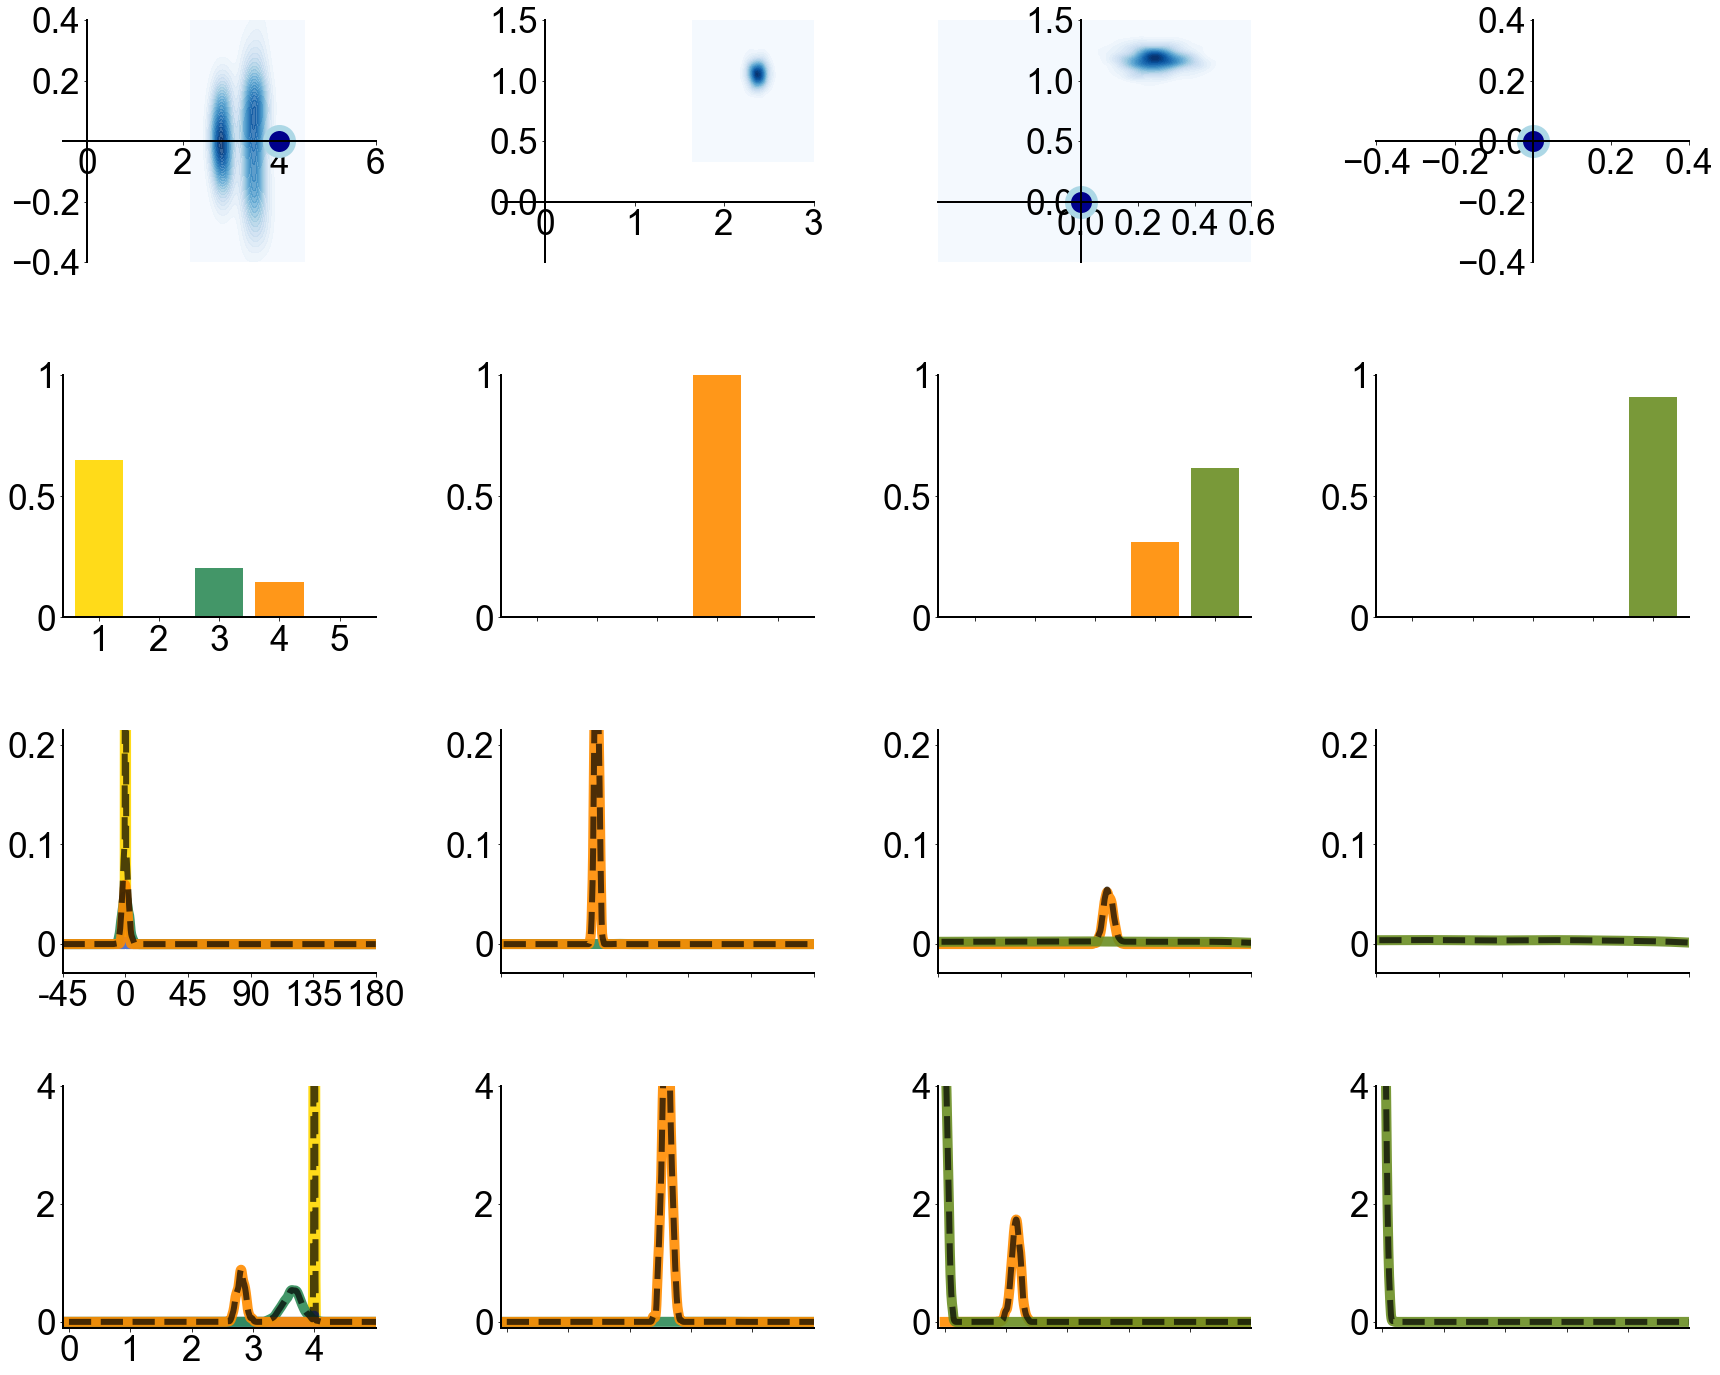

In [28]:
xtck_ = [-180,-135,-90,-45,0,45,90,135,180]
degree_values = np.linspace(-180, 180,l)
x_evalD = np.linspace(-180, 180, num=1000)
x_evalS = np.linspace(0, 6, num=1000)

ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
colors = ["gold", "royalblue", "seagreen","darkorange","olivedrab"]
cNames = ["CS Integration","CS Segmentation", "Center Reference", "Intermediate Reference", "Independent", "All"]
struct_id = [13,14,15,16,4,0]
_, axs = plt.subplots(4,4, figsize=(figS*4, figS*3.2))
axs = axs.flatten()
p=0
bw = 0.2
cs,ss = 2,2
degS = 45
xC = [45, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90]
XL = [[-0.5, 6],
      [-0.5, 3],
      [-0.5, 0.6],
      [-0.4, 0.4]]
YL = [[-0.4, 0.4],
      [-0.5, 1.5],
      [-0.5, 1.5],
      [-0.4, 0.4]]
xt = [[0,2,4,6],
      [0,1,2,3],
      [0,0.2,0.4,0.6],
      [-0.4,-0.2,0.2,0.4]]
yt = [[-0.4,-0.2,0.2,0.4],
      [0,0.5,1,1.5],
      [0,0.5,1,1.5],
      [-0.4,-0.2,0,0.2,0.4]]
for i in range(4):
    for si,six in enumerate([0,5,16,int(len(xC)-1)]):
        degC=xC[six]
        print("Speed: 4cps")
        print("direction: center=",degree_values[degC], "surround=0")
        
        #bw=0.03 if degC==90 else 0.2

        ax = axs[p]
        if i==0:
            bwk = 0.4
            x=vel_post[0,:,degC,degS,cs,ss]
            y=vel_post[1,:,degC,degS,cs,ss]
            # Define grid range based on the data
            e = 0.5
            x_min, x_max = x.min() - e, x.max() + e
            y_min, y_max = y.min() - e, y.max() + e
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
            grid_coords = np.vstack([xx.ravel(), yy.ravel()])
            if si==0:
                D1 = np.vstack([x[x<3.9], y[x<3.9]])
                D2 = np.vstack([x[x>=3.9], y[x>=3.9]])
                print("D", D1.shape, D2.shape)
                kde1 = gaussian_kde(D1,bw_method=bwk)
                zz1 = kde1(grid_coords).reshape(xx.shape)
                ax.plot([4],[0], "o", markersize=line_w+ms+5, markerfacecolor="darkblue", markeredgecolor="lightblue", markeredgewidth=line_w+4)
                #ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])
                ax.contourf(xx, yy, zz1, levels=30, cmap=CM[1], alpha=0.8)
                #ax.contourf(xx, yy, zz12, levels=30, cmap=CM[1], alpha=0.5)
            elif si==1:
                D = np.vstack([x, y])
                kde2 = gaussian_kde(D,bw_method=bwk)
                zz2 = kde2(grid_coords).reshape(xx.shape)
                ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])
            elif si==2:
                D = np.vstack([x[x!=0], y[y!=0]])
                print("D", D.shape)
                kde2 = gaussian_kde(D,bw_method=bwk)
                zz2 = kde2(grid_coords).reshape(xx.shape)
                ax.plot([0],[0], "o", markersize=line_w+ms+5, markerfacecolor="darkblue", markeredgecolor="lightblue", markeredgewidth=line_w+4)
                ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])
            else:
                ax.plot([0],[0], "o", markersize=line_w+ms+5, markerfacecolor="darkblue", markeredgecolor="lightblue", markeredgewidth=line_w+4)
            xl = XL[si]
            yl = YL[si]
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            # Move axes to the center (x=0 and y=0)
            ax.spines["left"].set_position(("data", 0))  # Position y-axis at x=0
            ax.spines["bottom"].set_position(("data", 0))  # Position x-axis at y=0
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)

            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xt[si])
            ax.yaxis.set_ticks(yt[si])
            ax.set_xlim(xl[0], xl[1])
            ax.set_ylim(yl[0], yl[1])

        elif i==3:
            ytck = [0,1,2,3,4]
            #ytckL = ["0","3","6","9","12"]
            mv = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[1][:,degC,degS,cs,ss].copy()
                if (Y0==0).all():
                    Y0 = np.random.normal(loc=0,scale=0.05,size=2000)
                kde = gaussian_kde(Y0, bw_method=0.2)
                Y = kde(x_evalS)
                X = x_evalS.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+8, alpha=0.9)
                mv.append(M)
            ax.plot(x_evalS, np.sum(mv, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(ytck)
            ax.yaxis.set_ticks([0,2,4])
            if p==12:
                ax.xaxis.set_ticklabels(ytck)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-0.1, 5)
            ax.set_ylim(-0.1, 4)
            ax.yaxis.set_ticklabels([0, 2, 4])
        elif i==1:
            for c,P in enumerate(struct_all[:-1]):
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                ax.bar(c, z, color=colors[c], alpha=0.9)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(range(len(struct_all)-1))
            #ax.xaxis.set_ticklabels(range(1,len(struct_all)))
            ax.yaxis.set_ticks([0,0.5, 1])
            ax.set_ylim(0, 1)
            ax.yaxis.set_ticklabels([0, 0.5, 1])
            ax.set_xlim(-0.6, 4.6)
            if p==4:
                ax.xaxis.set_ticklabels(range(1,len(struct_all)))
            else:
                ax.xaxis.set_ticklabels([])
        elif i==2:
            mv = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[0][:,degC,degS,cs,ss]
                Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
                kde = gaussian_kde(Y0, bw_method=bw)
                Y = kde(x_evalD)
                X = x_evalD.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+8, alpha=0.9)
                mv.append(M)
            ax.plot(x_evalD, np.sum(mv, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xtck_)
            
            if p==8:
                ax.xaxis.set_ticklabels(xtck_)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-45, 180)
            # if p in [10,12,14]:
            #     ax.yaxis.set_ticks([0,0.06, 0.12])
            #     ax.set_ylim(-0.015, 0.12)
            #     ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            # else:
            ax.yaxis.set_ticks([0,0.07, 0.14])
            ax.set_ylim(-0.02, 0.15)
            ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            #stimType = 'Center direction = '+str(round(xL[ti]))
            #ax.annotate(stimType, xy=(0.1,1.05),xycoords='axes fraction',fontsize=f_font1["size"])
        p+=1
    #ax.set_xlabel(" ")
    #ax.set_ylabel(L[i], **f_font2)
    #plt.tight_layout()
plt.tight_layout(h_pad=6, w_pad=4)
plt.savefig(sp+"MixPostDir_subj2_grp_surr0_main.pdf")
plt.show()

Speed: 4cps
direction: center= 0.0 surround=0
D (2, 364) (2, 636)
Speed: 4cps
direction: center= 44.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
D (2, 315)
Speed: 4cps
direction: center= 180.0 surround=0
Speed: 4cps
direction: center= 0.0 surround=0
Speed: 4cps
direction: center= 44.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
Speed: 4cps
direction: center= 180.0 surround=0
Speed: 4cps
direction: center= 0.0 surround=0
Speed: 4cps
direction: center= 44.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
Speed: 4cps
direction: center= 180.0 surround=0
Speed: 4cps
direction: center= 0.0 surround=0
Speed: 4cps
direction: center= 44.0 surround=0
Speed: 4cps
direction: center= 132.0 surround=0
Speed: 4cps
direction: center= 180.0 surround=0


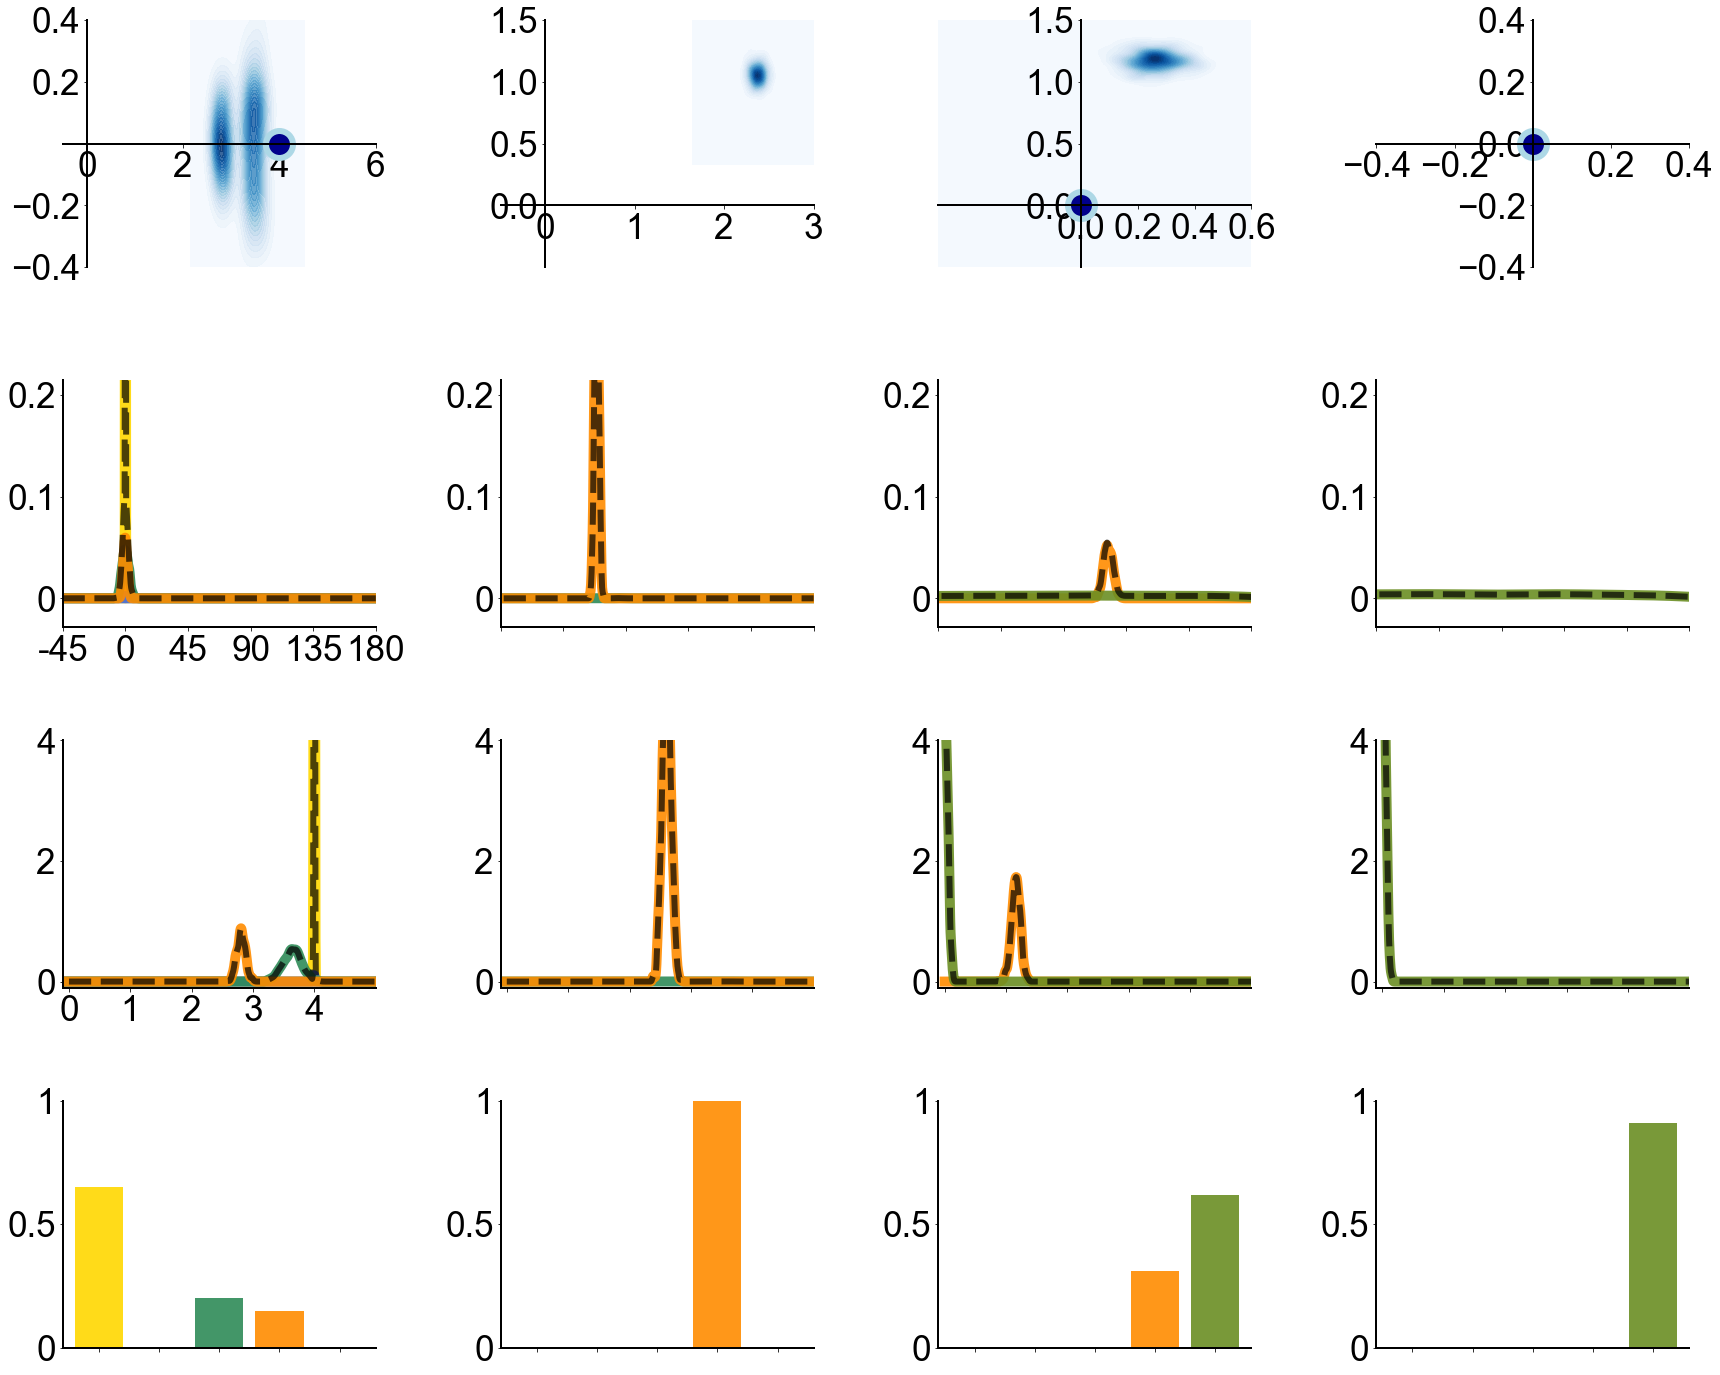

In [31]:
xtck_ = [-180,-135,-90,-45,0,45,90,135,180]
degree_values = np.linspace(-180, 180,l)
x_evalD = np.linspace(-180, 180, num=1000)
x_evalS = np.linspace(0, 6, num=1000)

ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
colors = ["gold", "royalblue", "seagreen","darkorange","olivedrab"]
cNames = ["CS Integration","CS Segmentation", "Center Reference", "Intermediate Reference", "Independent", "All"]
struct_id = [13,14,15,16,4,0]
_, axs = plt.subplots(4,4, figsize=(figS*4, figS*3.2))
axs = axs.flatten()
p=0
bw = 0.2
cs,ss = 2,2
degS = 45
xC = [45, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90]
XL = [[-0.5, 6],
      [-0.5, 3],
      [-0.5, 0.6],
      [-0.4, 0.4]]
YL = [[-0.4, 0.4],
      [-0.5, 1.5],
      [-0.5, 1.5],
      [-0.4, 0.4]]
xt = [[0,2,4,6],
      [0,1,2,3],
      [0,0.2,0.4,0.6],
      [-0.4,-0.2,0.2,0.4]]
yt = [[-0.4,-0.2,0.2,0.4],
      [0,0.5,1,1.5],
      [0,0.5,1,1.5],
      [-0.4,-0.2,0,0.2,0.4]]
for i in range(4):
    for si,six in enumerate([0,5,16,int(len(xC)-1)]):
        degC=xC[six]
        print("Speed: 4cps")
        print("direction: center=",degree_values[degC], "surround=0")
        
        #bw=0.03 if degC==90 else 0.2

        ax = axs[p]
        if i==0:
            bwk = 0.4
            x=vel_post[0,:,degC,degS,cs,ss]
            y=vel_post[1,:,degC,degS,cs,ss]
            # Define grid range based on the data
            e = 0.5
            x_min, x_max = x.min() - e, x.max() + e
            y_min, y_max = y.min() - e, y.max() + e
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
            grid_coords = np.vstack([xx.ravel(), yy.ravel()])
            if si==0:
                D1 = np.vstack([x[x<3.9], y[x<3.9]])
                D2 = np.vstack([x[x>=3.9], y[x>=3.9]])
                print("D", D1.shape, D2.shape)
                kde1 = gaussian_kde(D1,bw_method=bwk)
                zz1 = kde1(grid_coords).reshape(xx.shape)
                ax.plot([4],[0], "o", markersize=line_w+ms+5, markerfacecolor="darkblue", markeredgecolor="lightblue", markeredgewidth=line_w+4)
                #ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])
                ax.contourf(xx, yy, zz1, levels=30, cmap=CM[1], alpha=0.8)
                #ax.contourf(xx, yy, zz12, levels=30, cmap=CM[1], alpha=0.5)
            elif si==1:
                D = np.vstack([x, y])
                kde2 = gaussian_kde(D,bw_method=bwk)
                zz2 = kde2(grid_coords).reshape(xx.shape)
                ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])
            elif si==2:
                D = np.vstack([x[x!=0], y[y!=0]])
                print("D", D.shape)
                kde2 = gaussian_kde(D,bw_method=bwk)
                zz2 = kde2(grid_coords).reshape(xx.shape)
                ax.plot([0],[0], "o", markersize=line_w+ms+5, markerfacecolor="darkblue", markeredgecolor="lightblue", markeredgewidth=line_w+4)
                ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])
            else:
                ax.plot([0],[0], "o", markersize=line_w+ms+5, markerfacecolor="darkblue", markeredgecolor="lightblue", markeredgewidth=line_w+4)
            xl = XL[si]
            yl = YL[si]
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            # Move axes to the center (x=0 and y=0)
            ax.spines["left"].set_position(("data", 0))  # Position y-axis at x=0
            ax.spines["bottom"].set_position(("data", 0))  # Position x-axis at y=0
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)

            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xt[si])
            ax.yaxis.set_ticks(yt[si])
            ax.set_xlim(xl[0], xl[1])
            ax.set_ylim(yl[0], yl[1])

        elif i==2:
            ytck = [0,1,2,3,4]
            #ytckL = ["0","3","6","9","12"]
            mv = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[1][:,degC,degS,cs,ss].copy()
                if (Y0==0).all():
                    Y0 = np.random.normal(loc=0,scale=0.05,size=2000)
                kde = gaussian_kde(Y0, bw_method=0.2)
                Y = kde(x_evalS)
                X = x_evalS.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+8, alpha=0.9)
                mv.append(M)
            ax.plot(x_evalS, np.sum(mv, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(ytck)
            ax.yaxis.set_ticks([0,2,4])
            if p==8:
                ax.xaxis.set_ticklabels(ytck)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-0.1, 5)
            ax.set_ylim(-0.1, 4)
            ax.yaxis.set_ticklabels([0, 2, 4])
        elif i==3:
            for c,P in enumerate(struct_all[:-1]):
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                ax.bar(c, z, color=colors[c], alpha=0.9)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(range(len(struct_all)-1))
            #ax.xaxis.set_ticklabels(range(1,len(struct_all)))
            ax.yaxis.set_ticks([0,0.5, 1])
            ax.set_ylim(0, 1)
            ax.yaxis.set_ticklabels([0, 0.5, 1])
            ax.set_xlim(-0.6, 4.6)
            ax.xaxis.set_ticklabels([])
        elif i==1:
            mv = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[0][:,degC,degS,cs,ss]
                Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
                kde = gaussian_kde(Y0, bw_method=bw)
                Y = kde(x_evalD)
                X = x_evalD.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+8, alpha=0.9)
                mv.append(M)
            ax.plot(x_evalD, np.sum(mv, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xtck_)
            if p==4:
                ax.xaxis.set_ticklabels(xtck_)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-45, 180)
            # if p in [10,12,14]:
            #     ax.yaxis.set_ticks([0,0.06, 0.12])
            #     ax.set_ylim(-0.015, 0.12)
            #     ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            # else:
            ax.yaxis.set_ticks([0,0.07, 0.14])
            ax.set_ylim(-0.02, 0.15)
            ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            #stimType = 'Center direction = '+str(round(xL[ti]))
            #ax.annotate(stimType, xy=(0.1,1.05),xycoords='axes fraction',fontsize=f_font1["size"])
        p+=1
    #ax.set_xlabel(" ")
    #ax.set_ylabel(L[i], **f_font2)
    #plt.tight_layout()
plt.tight_layout(h_pad=6, w_pad=4)
plt.savefig(sp+"onlyMixPostDir_subj2_grp_surr0_main.pdf")
plt.show()

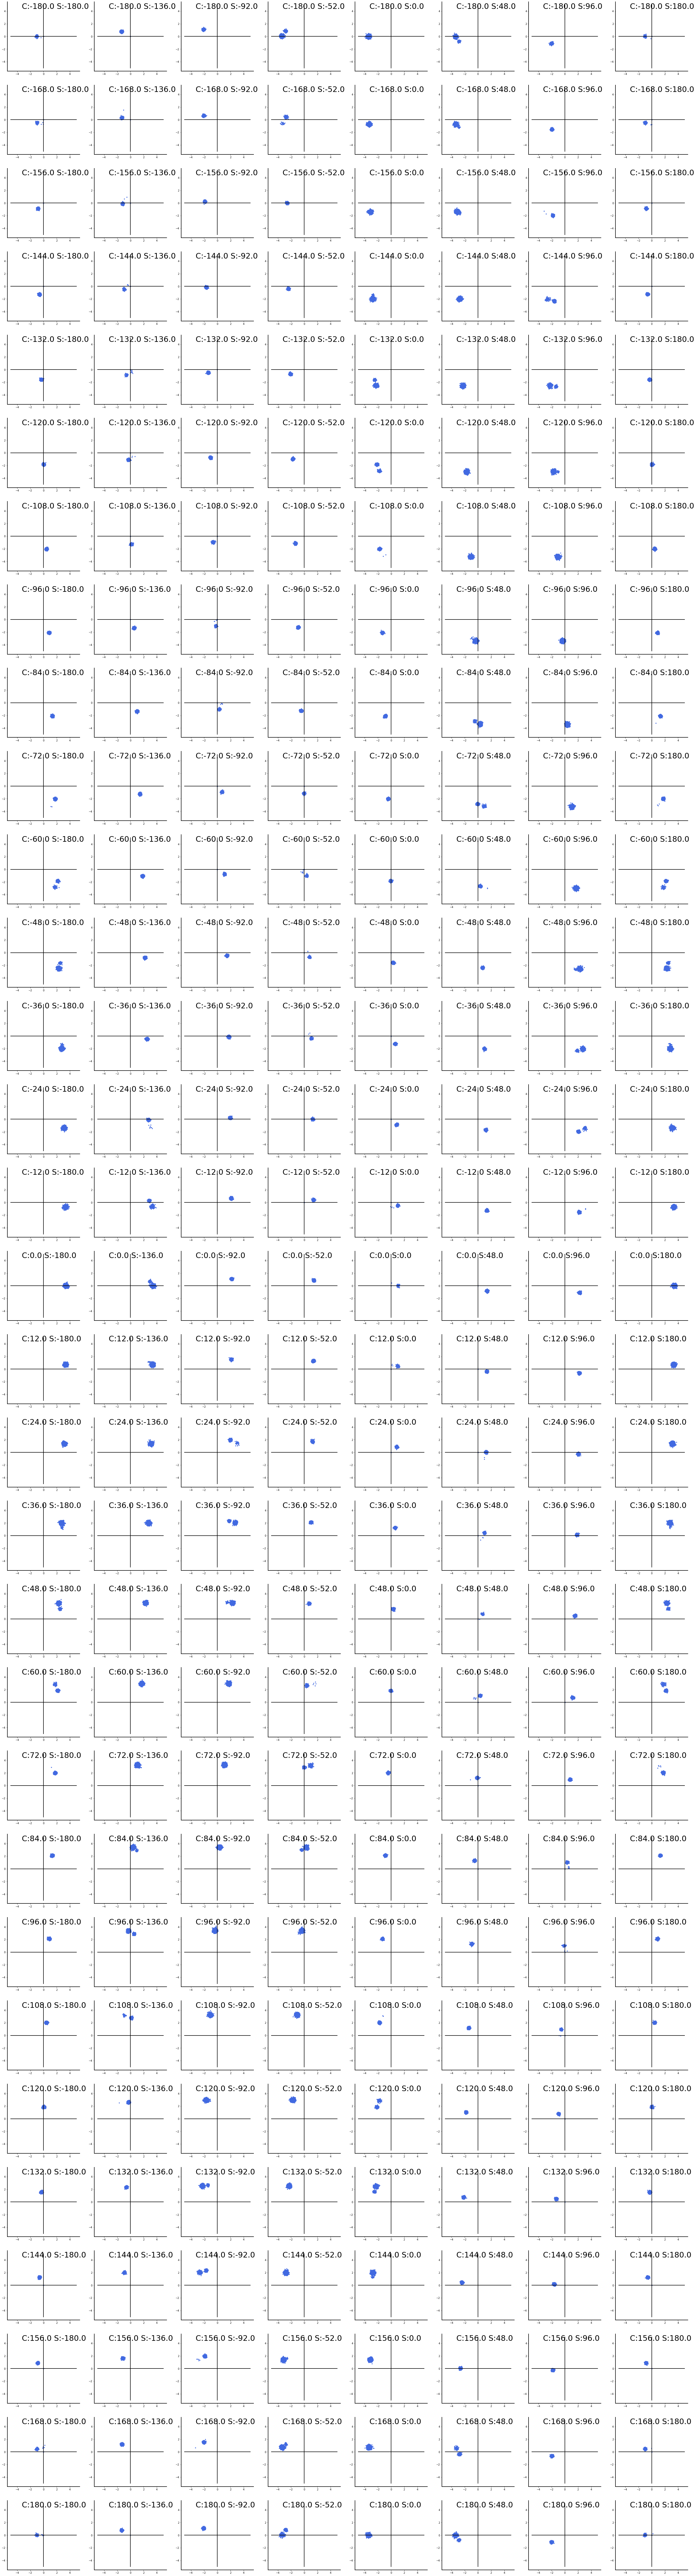

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
transformed_values = ((np.arange(l) - 45) / 45) * 180
x2 = [0,11,22,32,45,57,69,90]
x1 = range(0, l, 3)
_, axs = plt.subplots(len(x1), 8, figsize=(figS*8, figS*len(x1)))
axs = axs.flatten()
p=0
t=0
for d1 in x1:
    for d2 in x2:
        ax = axs[t]
        ax.plot(vel_post[0,:,d1,d2,2,2], vel_post[1,:,d1,d2,2,2], ".",  color="royalblue")
        ax.plot([0,0], [-5,5], "k", linewidth=line_w)
        ax.plot([-5,5], [0,0], "k", linewidth=line_w)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_linewidth(line_w)
        ax.spines["bottom"].set_linewidth(line_w)
        ax.spines["left"].set_linewidth(line_w)
        #ax.set_xlim(-5, 5)
        #ax.set_ylim(-5, 5)
        ax.grid(False)
        ax.annotate("C:"+str(np.round(transformed_values[d1]))+" "+"S:"+str(np.round(transformed_values[d2])), xy=(0.2,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
        t+=1
plt.savefig(sp+"AllPostVel_subj2_grp_scl1.pdf")
plt.show()


In [25]:
dir_post[:,degC,degS,2,2]

array([-31.59337189, -28.999566  , -31.36725298, -30.82362228,
       -31.77139822, -36.86142115, -29.50316479, -27.69875276,
       -24.3723639 , -36.84596436, -28.78723497, -29.97603719,
       -32.11772473, -25.72393167, -24.68781355, -29.43128928,
       -25.79370998, -34.82706567, -26.77076377, -30.30028937,
       -29.851244  , -25.30819738, -35.9138725 , -35.47925237,
       -26.64671278, -27.92948357, -30.11860542, -32.7936914 ,
       -30.60925602, -32.26892944, -34.67191839, -29.5304672 ,
       -26.37731926, -24.70141849, -30.47515728, -32.48101382,
       -32.47720697, -28.01948084, -31.90767374, -30.75776135,
       -20.99430627, -33.68473299, -29.33420284, -32.71960212,
       -27.20991817, -26.5722827 , -33.52249317, -33.60847393,
       -35.13064889, -30.53152517, -30.2727791 , -25.59861296,
       -30.4670789 , -30.45290305, -35.09012133, -24.72477475,
       -34.53095964, -33.3985393 , -33.3689756 , -29.58372494,
       -28.05195749, -32.12968146, -31.34378244, -22.07

-7.929984386404722 -174.9530526501365
-177.83783783783784 177.8378378378378


NameError: name 'transformed_values' is not defined

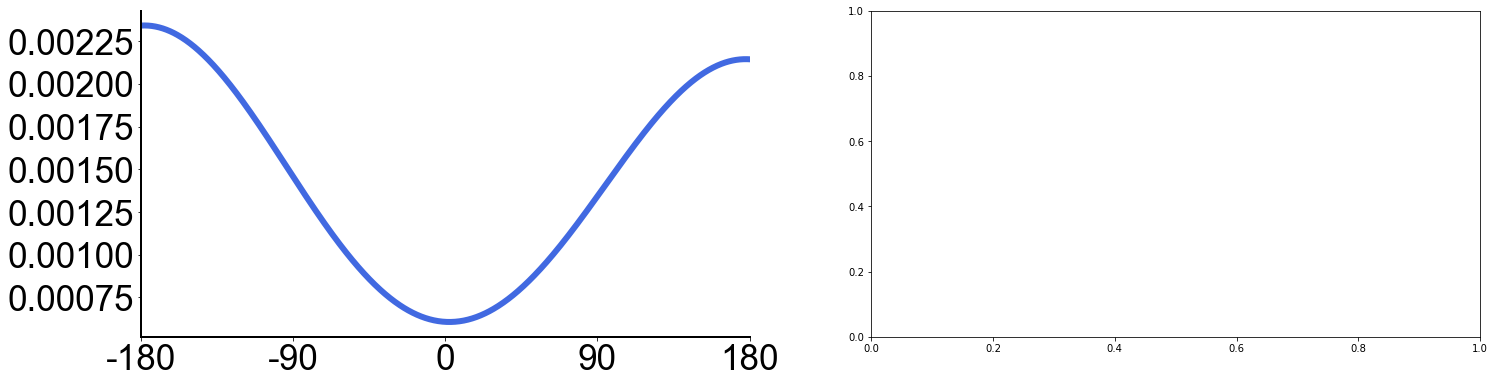

In [15]:
_, axs = plt.subplots(1, 2, figsize=(figS*4, figS))
axs = axs.flatten()
degC,degS = 90,45
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
for i in range(2):
    ax = axs[i]
    if i==0:
        x_eval = np.linspace(-180, 180, num=1000)
        Y0 = dir_post[:,degC,degS,2,2]
        print(np.mean(Y0), np.median(Y0))
        Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
        kde = gaussian_kde(Y0, bw_method=0.5)
        Y = kde(x_eval)
        X = x_eval.copy()
        print(X[np.argmax(Y)],X[np.argmax(Y[900:])+900])
        ax.plot(X,Y,  color="royalblue", linewidth=line_w+4)
        #ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_linewidth(line_w)
        ax.spines["bottom"].set_linewidth(line_w)
        ax.spines["left"].set_linewidth(line_w)
        ax.grid(False)
        for label in (ax.get_xticklabels()+ax.get_yticklabels()):
            label.set_fontname(f_font1["fontname"])
            label.set_fontsize(35)
        ax.xaxis.set_ticks(xtck_)
        ax.xaxis.set_ticklabels(xtckL)
        ax.set_xlim(-180, 180)
        ax.annotate("C:"+str(np.round(transformed_values[degC]))+" "+"S:"+str(np.round(transformed_values[degS])), xy=(0.6,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
    else:
        ytck = [0,1,2,3,4]
        #ytckL = ["0","3","6","9","12"]
        x_eval = np.linspace(0, 6, num=1000)
        Z=spd_post[:,degC,degS,2,2]
        print(np.mean(Z), np.median(Z))
        kde = gaussian_kde(Z)
        Y = kde(x_eval)
        X = x_eval.copy()
        print(X[np.argmax(Y)],X[np.argmax(Y[:480])])
        ax.plot(X,Y,  color="royalblue", linewidth=line_w+4)
        #ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
        #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_linewidth(line_w)
        ax.spines["bottom"].set_linewidth(line_w)
        ax.spines["left"].set_linewidth(line_w)
        ax.grid(False)
        for label in (ax.get_xticklabels()+ax.get_yticklabels()):
            label.set_fontname(f_font1["fontname"])
            label.set_fontsize(35)
        ax.xaxis.set_ticks(ytck)
        ax.yaxis.set_ticks([0,2,4])
        ax.xaxis.set_ticklabels(ytck)
        ax.set_xlim(-0.1, 4)
        ax.set_ylim(-0.1, 4)
        ax.yaxis.set_ticklabels([0, 2, 4])
plt.show()

Speed: 7cps
direction: center=45, surround=0


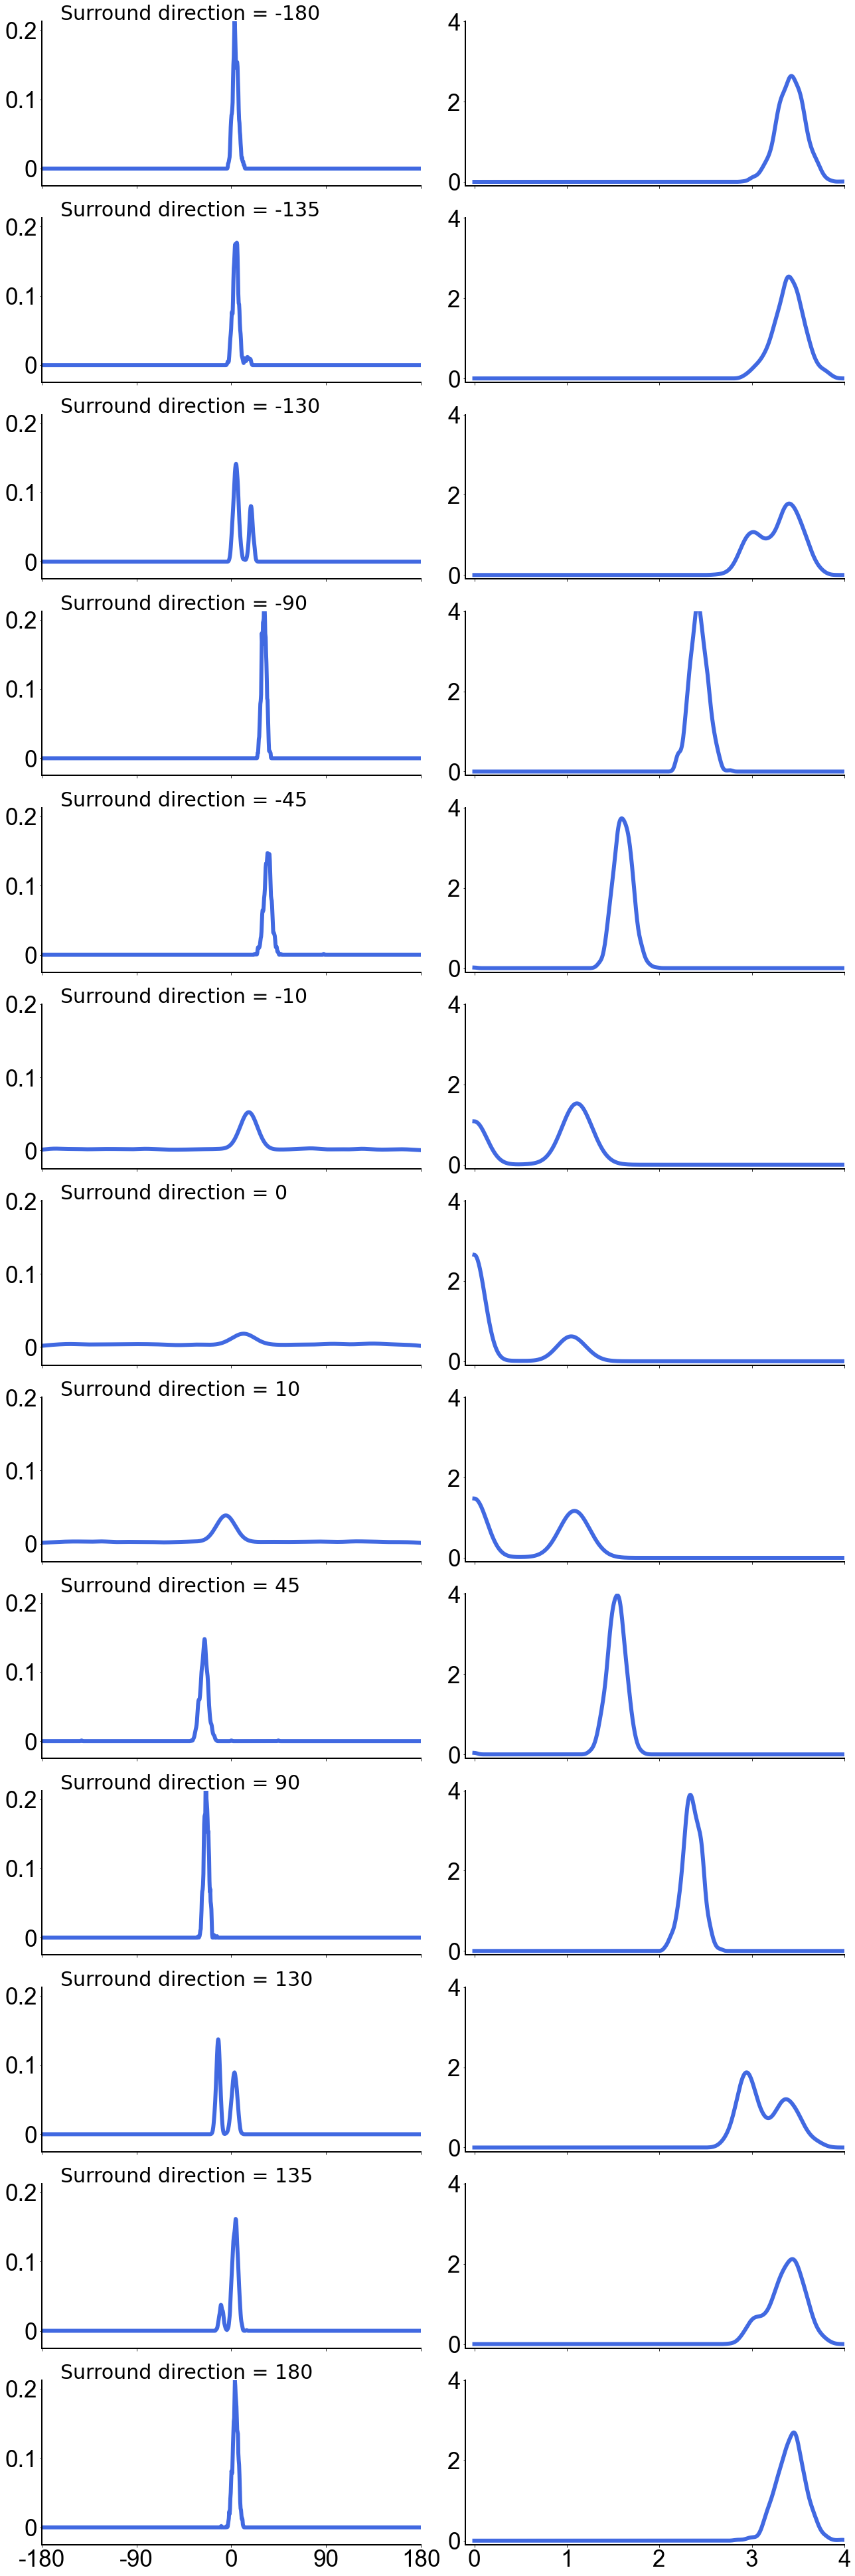

In [10]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]

degS = int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
x = [2, 11, 13, 23, 34, 43, 45, 48, 57, 68, 78, 80,88]
xL = [-180,-135,-130,-90,-45,-10,0,10,45,90,130,135,180]
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, axs = plt.subplots(len(x), 2, figsize=(figS*3, figS*9))
axs = axs.flatten()
p=0
for ti,degC in enumerate(x):
    for i in range(2):
        ax = axs[p]
        if i==0:
            x_eval = np.linspace(-180, 180, num=1000)
            Y0 = dir_post[:,degS,degC,2,2]
            Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
            kde = gaussian_kde(Y0, bw_method=0.1)
            Y = kde(x_eval)
            X = x_eval.copy()
            
            ax.plot(X,Y,  color="royalblue", linewidth=line_w+4)
            #ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xtck_)
            
            if p>23:
                ax.xaxis.set_ticklabels(xtckL)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-180, 180)
            if p in [10,12,14]:
                ax.yaxis.set_ticks([0,0.06, 0.12])
                ax.set_ylim(-0.015, 0.12)
                ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            else:
                ax.yaxis.set_ticks([0,0.08, 0.16])
                ax.set_ylim(-0.02, 0.17)
                ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            stimType = 'Surround direction = '+str(xL[ti])
            ax.annotate(stimType, xy=(0.05,1.01),xycoords='axes fraction',fontsize=f_font1["size"])
        else:
            ytck = [0,1,2,3,4]
            #ytckL = ["0","3","6","9","12"]
            x_eval = np.linspace(0, 6, num=1000)
            kde = gaussian_kde(spd_post[:,degS,degC,2,2])
            Y = kde(x_eval)
            X = x_eval.copy()
            ax.plot(X,Y,  color="royalblue", linewidth=line_w+4)
            #ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(ytck)
            ax.yaxis.set_ticks([0,2,4])
            if p>23:
                ax.xaxis.set_ticklabels(ytck)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-0.1, 4)
            ax.set_ylim(-0.1, 4)
            ax.yaxis.set_ticklabels([0, 2, 4])
        p+=1
    #ax.set_xlabel(" ")
    #ax.set_ylabel(L[i], **f_font2)
    #plt.tight_layout()
    #plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.tight_layout(h_pad=2)
plt.show()

Speed: 7cps
direction: center=45, surround=0


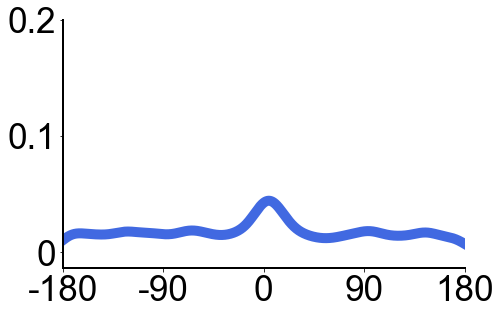

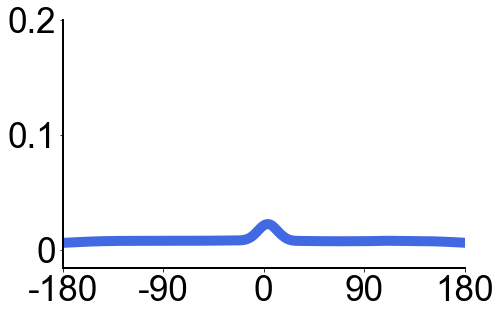

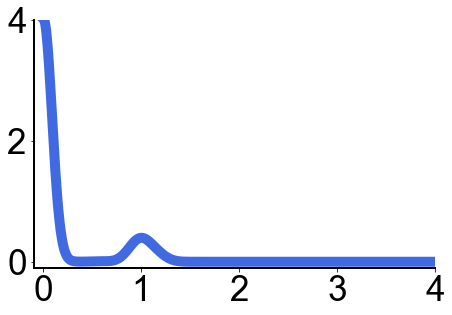

-0.5681070933156718 1.7521610746104355
-0.7530027046839829 0.910384545417549


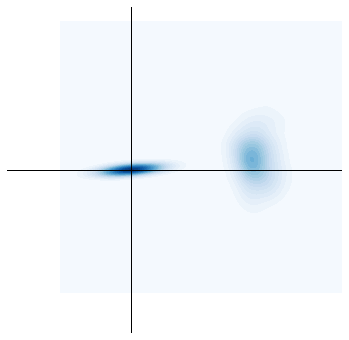

-0.5681070933156718 1.7521610746104355
-0.7530027046839829 0.910384545417549


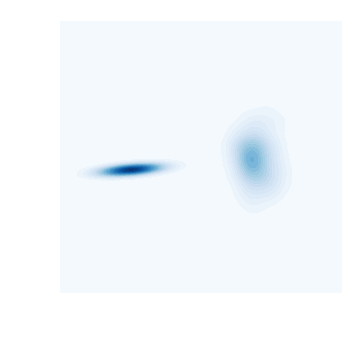

-0.5681070933156718 1.7521610746104355
-0.7530027046839829 0.910384545417549


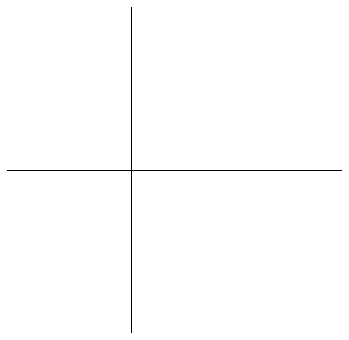

In [23]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
Y0 = dir_post[:,deg0,deg0,2,2]
Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
kde = gaussian_kde(Y0, bw_method=0.1)
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.015, 0.03])
ax.xaxis.set_ticklabels(xtckL)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.002, 0.03)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
x=vel_post[0,:,deg0,deg0,2,2]
y=vel_post[1,:,deg0,deg0,2,2]
ix = (x==0) & (y==0)
notix = np.logical_not(ix)
Y0 = np.random.uniform(-180, 180, sum(ix))
Y1 = np.arctan2(y[notix], x[notix])*180/np.pi
# plt.plot(x[notix], y[notix], "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
# plt.plot(Y1, "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
kde1 = gaussian_kde(Y0)
Y0 = kde1(x_eval)
kde2 = gaussian_kde(Y1)
Y1 = kde2(x_eval)
X = x_eval.copy()
#ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
ax.plot(X,(0.2*Y1+0.8*Y0)+0.003,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtckL)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

#l = dir_post.shape[1]
#xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [0,1,2,3,4]
#ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 6, num=1000)
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
kde = gaussian_kde(spd_post[:,deg0,deg0,2,2])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
#ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,2,4])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(-0.1, 4)
ax.set_ylim(-0.1, 4)
ax.yaxis.set_ticklabels([0, 2, 4])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostSpd_subj2_rel.pdf")
plt.show()

x=vel_post[0,:,deg0,deg0,2,2]
y=vel_post[1,:,deg0,deg0,2,2]
D = np.vstack([x[x!=0], y[y!=0]])
kde1 = gaussian_kde(D,bw_method=0.5)
D = np.vstack([x, y])
kde2 = gaussian_kde(D,bw_method=0.5)
# Define grid range based on the data
e = 0.5
x_min, x_max = x.min() - e, x.max() + e
y_min, y_max = y.min() - e, y.max() + e
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
zz1 = kde1(grid_coords).reshape(xx.shape)
zz2 = kde2(grid_coords).reshape(xx.shape)
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-1., 1.7]
yl = [-1., 1.]
# tk = 0.5
# range_ = 0.5
# d=range_/10
# ax.plot([-tk,-tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[-tk,-tk], "-", color="k", linewidth=line_w)
# ax.plot([tk,tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[tk,tk], "-", color="k", linewidth=line_w)
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz1*0.63 + zz2*0.37, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-1., 1.7]
yl = [-1., 1.]
# tk = 0.5
# range_ = 0.5
# d=range_/10
# ax.plot([-tk,-tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[-tk,-tk], "-", color="k", linewidth=line_w)
# ax.plot([tk,tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[tk,tk], "-", color="k", linewidth=line_w)
#ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
#ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz1*0.63 + zz2*0.37, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-1., 1.7]
yl = [-1., 1.]
# tk = 0.5
# range_ = 0.5
# d=range_/10
# ax.plot([-tk,-tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[-tk,-tk], "-", color="k", linewidth=line_w)
# ax.plot([tk,tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[tk,tk], "-", color="k", linewidth=line_w)
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
#ax.contourf(xx, yy, zz1*0.63 + zz2*0.37, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

Speed: 7cps
direction: center=45, surround=0


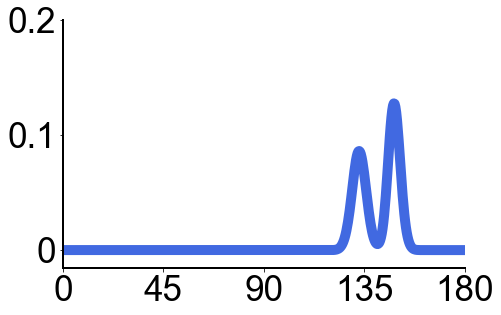

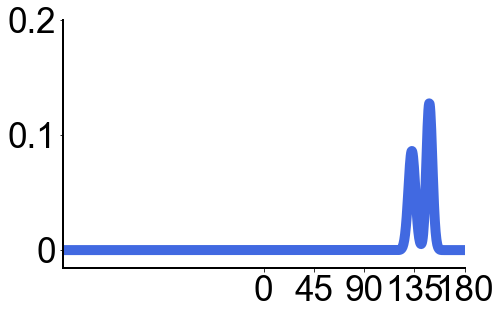

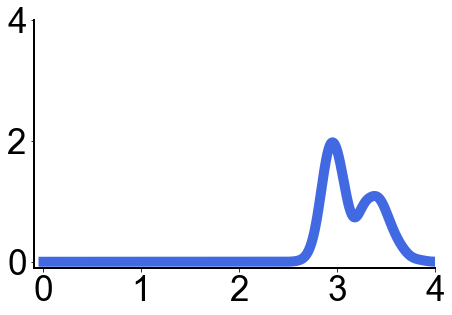

-3.2908255648424203 -1.3953139041912268
0.8024641354399136 3.400045905166224


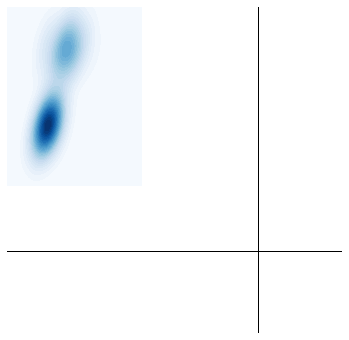

-3.2908255648424203 -1.3953139041912268
0.8024641354399136 3.400045905166224


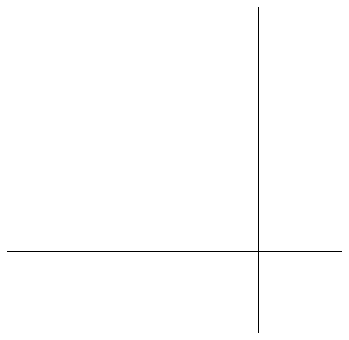

-3.2908255648424203 -1.3953139041912268
0.8024641354399136 3.400045905166224


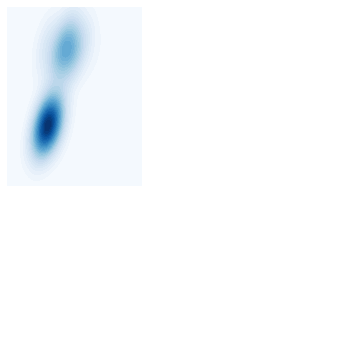

In [24]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [0,45,90,135,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = deg0+int(np.round(l/4))+int(np.round(l/8))-2
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
Y0 = dir_post[:,deg45,deg0,2,2]
Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
kde = gaussian_kde(Y0)
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtck_)
ax.set_xlim(0, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
ix = (x==0) & (y==0)
notix = np.logical_not(ix)
#Y0 = np.random.uniform(-180, 180, sum(ix))
Y1 = np.arctan2(y[notix], x[notix])*180/np.pi
# plt.plot(x[notix], y[notix], "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
# plt.plot(Y1, "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
#kde1 = gaussian_kde(Y0)
#Y0 = kde1(x_eval)
kde2 = gaussian_kde(Y1)
Y1 = kde2(x_eval)
X = x_eval.copy()
#ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtck_)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

#l = dir_post.shape[1]
#xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [0,1,2,3,4]
#ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 6, num=1000)
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
kde = gaussian_kde(spd_post[:,deg45,deg0,2,2])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
#ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,2,4])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(-0.1, 4)
ax.set_ylim(-0.1, 4)
ax.yaxis.set_ticklabels([0, 2, 4])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostSpd_subj2_rel.pdf")
plt.show()

x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
#D = np.vstack([x[x!=0], y[y!=0]])
#kde1 = gaussian_kde(D,bw_method=0.5)
D = np.vstack([x, y])
kde2 = gaussian_kde(D,bw_method=0.5)
# Define grid range based on the data
e = 0.5
x_min, x_max = x.min() - e, x.max() + e
y_min, y_max = y.min() - e, y.max() + e
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
#zz1 = kde1(grid_coords).reshape(xx.shape)
zz2 = kde2(grid_coords).reshape(xx.shape)
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
#ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
#ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
#ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

Speed: 7cps
direction: center=45, surround=0


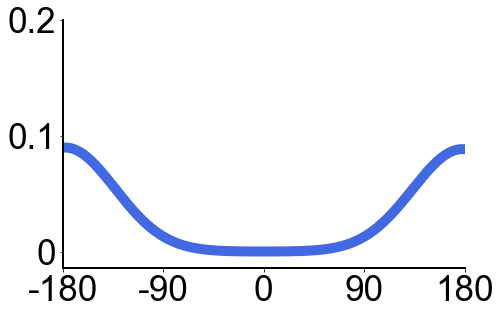

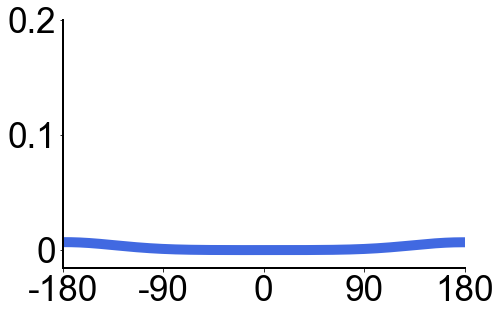

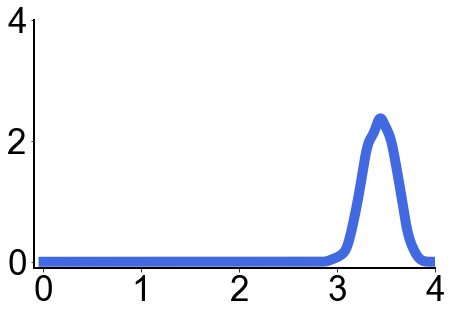

-4.3333728242079586 -2.4419714618562742
-1.1117803541644316 0.959374417287834


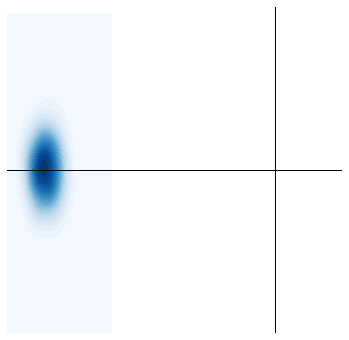

-4.3333728242079586 -2.4419714618562742
-1.1117803541644316 0.959374417287834


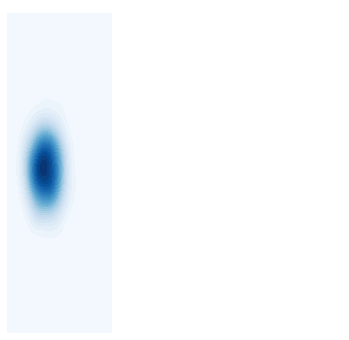

-4.3333728242079586 -2.4419714618562742
-1.1117803541644316 0.959374417287834


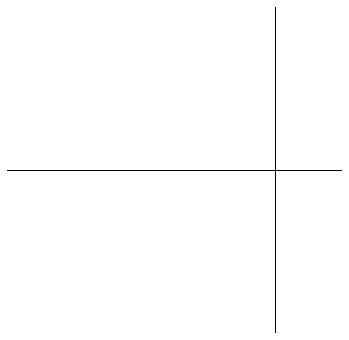

In [25]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = l-1
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
Y0 = dir_post[:,deg45,deg0,2,2]
Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
kde = gaussian_kde(Y0)
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.005, 0.01])
ax.xaxis.set_ticklabels(xtckL)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.0007, 0.01)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
ix = (x==0) & (y==0)
notix = np.logical_not(ix)
#Y0 = np.random.uniform(-180, 180, sum(ix))
Y1 = np.arctan2(y[notix], x[notix])*180/np.pi
# plt.plot(x[notix], y[notix], "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
# plt.plot(Y1, "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
#kde1 = gaussian_kde(Y0)
#Y0 = kde1(x_eval)
kde2 = gaussian_kde(Y1)
Y1 = kde2(x_eval)
X = x_eval.copy()
#ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtckL)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

#l = dir_post.shape[1]
#xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [0,1,2,3,4]
#ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 6, num=1000)
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
kde = gaussian_kde(spd_post[:,deg45,deg0,2,2])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
#ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,2,4])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(-0.1, 4)
ax.set_ylim(-0.1, 4)
ax.yaxis.set_ticklabels([0, 2, 4])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostSpd_subj2_rel.pdf")
plt.show()

x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
#D = np.vstack([x[x!=0], y[y!=0]])
#kde1 = gaussian_kde(D,bw_method=0.5)
D = np.vstack([x, y])
kde2 = gaussian_kde(D,bw_method=0.5)
# Define grid range based on the data
e = 0.5
x_min, x_max = x.min() - e, x.max() + e
y_min, y_max = y.min() - e, y.max() + e
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
#zz1 = kde1(grid_coords).reshape(xx.shape)
zz2 = kde2(grid_coords).reshape(xx.shape)
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-4, 1]
yl = [-1, 1]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-4, 1]
yl = [-1, 1]
#ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
#ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-4, 1]
yl = [-1, 1]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
#ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()


In [15]:
# open the file in read mode
with h5py.File('/Users/glengyel/Projects_data/Neural Predictions/post_vel_relVar_subj2_relstruct.mat', 'r') as file:
    # list all the keys in the root group
    print(list(file.keys()))

    # access a dataset
    vel_post = file['vel_post']
    #print(vel_post.shape)
    vel_post = np.array(vel_post)
    print(vel_post.shape)

    # access a dataset
    dir_post = file['dir_post']
    #print(dir_post.shape)
    dir_post = np.array(dir_post)
    print(dir_post.shape)

    # access a dataset
    spd_post = file['spe_post']
    #print(spd_post.shape)
    spd_post = np.array(spd_post)
    print(spd_post.shape)

['#refs#', '#subsystem#', 'c', 'c_dir', 'c_speed', 'causalStruct', 'dir_post', 'dir_vec', 'gap', 'id1', 'lenCaus', 'len_c', 'len_c_speed', 'len_s', 'len_s_speed', 'model', 'model_params', 'model_type', 'models_all', 'n', 'ndots', 'ndots_all', 'noise', 'ns', 'num_trials', 'point', 's', 's_dir', 's_speed', 'sig_id', 'spe_post', 'speed_vec', 'subid', 'subid_all', 'varType', 'vel_post']
(2, 1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)


Speed: 7cps
direction: center=45, surround=0


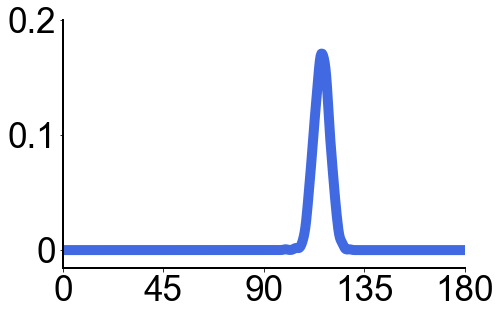

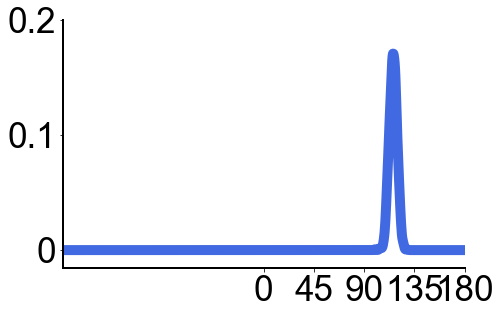

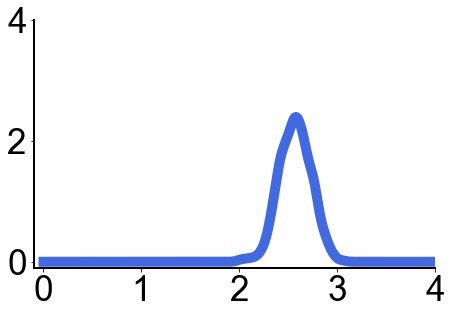

-2.1263197139759837 0.0636446813118145
1.2549731849163888 3.26920557295621


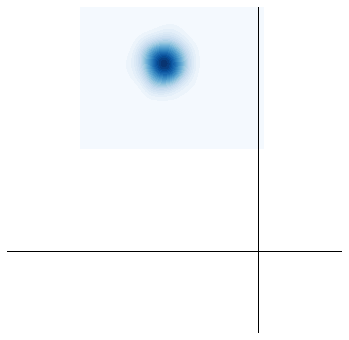

-2.1263197139759837 0.0636446813118145
1.2549731849163888 3.26920557295621


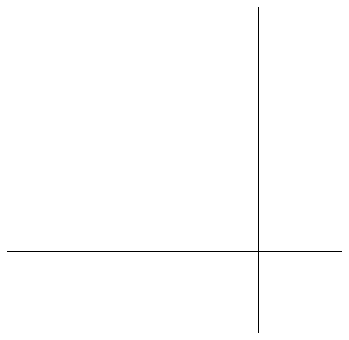

-2.1263197139759837 0.0636446813118145
1.2549731849163888 3.26920557295621


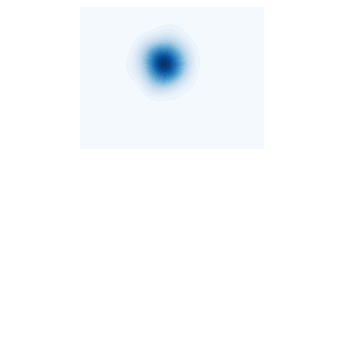

In [21]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [0,45,90,135,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
Y0 = dir_post[:,deg45,deg0,2,2]
Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
kde = gaussian_kde(Y0)
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtck_)
ax.set_xlim(0, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
ix = (x==0) & (y==0)
notix = np.logical_not(ix)
#Y0 = np.random.uniform(-180, 180, sum(ix))
Y1 = np.arctan2(y[notix], x[notix])*180/np.pi
# plt.plot(x[notix], y[notix], "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
# plt.plot(Y1, "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
#kde1 = gaussian_kde(Y0)
#Y0 = kde1(x_eval)
kde2 = gaussian_kde(Y1)
Y1 = kde2(x_eval)
X = x_eval.copy()
#ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtck_)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

#l = dir_post.shape[1]
#xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [0,1,2,3,4]
#ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 6, num=1000)
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
kde = gaussian_kde(spd_post[:,deg45,deg0,2,2])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
#ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,2,4])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(-0.1, 4)
ax.set_ylim(-0.1, 4)
ax.yaxis.set_ticklabels([0, 2, 4])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostSpd_subj2_rel.pdf")
plt.show()

x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
#D = np.vstack([x[x!=0], y[y!=0]])
#kde1 = gaussian_kde(D,bw_method=0.5)
D = np.vstack([x, y])
kde2 = gaussian_kde(D,bw_method=0.5)
# Define grid range based on the data
e = 0.5
x_min, x_max = x.min() - e, x.max() + e
y_min, y_max = y.min() - e, y.max() + e
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
#zz1 = kde1(grid_coords).reshape(xx.shape)
zz2 = kde2(grid_coords).reshape(xx.shape)
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"c4.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
#ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"c4.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
#ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
#ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"c4.pdf")
plt.show()
